In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageChops
import PIL
import math, operator

In [2]:
img = cv2.imread('./images/img1.jpg',0)

In [3]:
hist = cv2.equalizeHist(img)

In [4]:
res = np.hstack((img,hist))

In [5]:
cv2.imshow('img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
def histeq(img):
    # Calculate the histogram of the image
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    eq_img = cdf[img]
    return eq_img

In [7]:
user_hist_eq = histeq(img)

In [8]:
cv2.imshow('img',user_hist_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
def rmse(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same shape"
    mse = np.mean((image1 - image2) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [10]:
rmse(hist,user_hist_eq)

0.7429012662504048

Text(0.5, 1.0, 'Histogram Img (part b)')

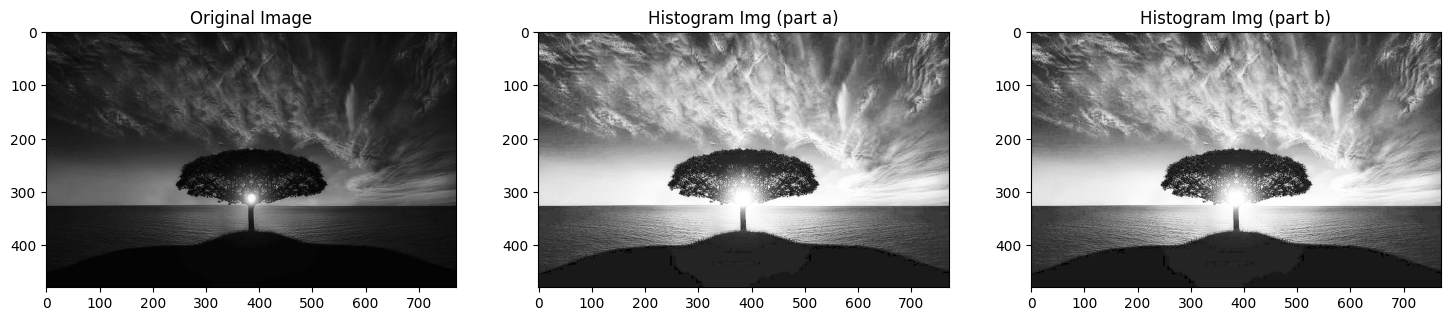

In [11]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img,cmap='gray'); plt.title('Original Image')
plt.subplot(132); plt.imshow(hist,cmap='gray'); plt.title('Histogram Img (part a)')
plt.subplot(133); plt.imshow(user_hist_eq,cmap='gray'); plt.title('Histogram Img (part b)')